# DYU Text mining workshop

In [94]:
# !pip install pandas
# !pip install seaborn
# !pip install jieba
# !pip install wordcloud
# !pip install jiagu
# !pip install opencc-python-reimplemented
# !pip install snownlp

## Import packages

In [1]:
import requests
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams['axes.unicode_minus']=False

import re
import jieba
import wordcloud 

# import jiagu
from opencc import OpenCC
from snownlp import SnowNLP

## Udn news

### Step1: Request

In [17]:
url = 'https://udn.com/api/more?page=700&id=search:台積電&channelId=2&type=searchword'
resp = requests.get(url)
resp.json()

{'state': True,
 'page': 700,
 'end': True,
 'lists': [{'url': 'https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2014/07/29/99/126998.jpg',
   'titleLink': 'https://fund.udn.com/fund/story/5879/175767',
   'title': '基金facebook／鐘國忠投資三心法 搶賺龍年財',
   'paragraph': '【經濟日報╱文／魏興中】台股兔年封關。回顧過去、展望未來，日盛投顧分析師鐘國忠認為，龍年台股行情雖不看淡，但由於外在不確定性變因增加，使操作難度明顯提升，不過，秉持「投資目的、慎選老闆、景氣燈號」三...',
   'cateLink': 'https://fund.udn.com',
   'cateTitle': '基金',
   'time': {'dateTime': '2012-01-30 00:00:00', 'date': '2012-01-30 00:00:00'}},
  {'url': 'https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2014/07/29/99/126900.jpg',
   'titleLink': 'https://fund.udn.com/fund/story/5879/175628',
   'title': '基金facebook／陸行之 努力+努力 唯一心法',
   'paragraph': '【經濟日報╱文／溫建勳】巴克萊證券亞太半導體首席分析師陸行之，在外資圈素有「半導體一哥」的美名，甚至有人慕名而到巴克萊工作，希望從他身上學習如何成為研究產業的頂尖高手。但對他而言，化繁為簡的心法是：...',
   'cateLink': 'https://fund.udn.com',
   'cateTitle': '基金',
   'time': {'dateTime': '2012-01-16 00:00:00', 'date': '2012-01-16 00:00:00'}},
  {'u

### Step2: To DataFrame

In [18]:
url = 'https://udn.com/api/more?page=700&id=search:台積電&channelId=2&type=searchword'
resp = requests.get(url)
pd.DataFrame(resp.json()['lists'])

,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://fund.udn.com/fund/story/5879/175767,基金facebook／鐘國忠投資三心法 搶賺龍年財,【經濟日報╱文／魏興中】台股兔年封關。回顧過去、展望未來，日盛投顧分析師鐘國忠認為，龍年台股...,https://fund.udn.com,基金,"{'dateTime': '2012-01-30 00:00:00', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://fund.udn.com/fund/story/5879/175628,基金facebook／陸行之 努力+努力 唯一心法,【經濟日報╱文／溫建勳】巴克萊證券亞太半導體首席分析師陸行之，在外資圈素有「半導體一哥」的美...,https://fund.udn.com,基金,"{'dateTime': '2012-01-16 00:00:00', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/6032/357828,台積電員工「享瘦」 10周減20公斤,【聯合報╱記者周宗禎／台南報導】 台積電南科廠區上萬員工有4成過胖，廠方警覺辦「健康享瘦營」...,https://health.udn.com,元氣網,"{'dateTime': '2011-11-26 00:00:00', 'date': '2..."
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5964/355750,哪家公司午覺時間最長、哪家又可玩社團？,【元氣周報／記者薛翔之、賴昭穎、孫中英、朱婉寧、羅介妤、黃郁文／報導】上班族中午休息時間，有...,https://health.udn.com,元氣網,"{'dateTime': '2011-08-15 00:00:00', 'date': '2..."
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5999/351111,爆肝族：終於有保障了,【聯合報╱記者李青霖／新竹市報導】「真的嗎？太好了！」科技業「爆肝」多，新竹科學園區一名半導...,https://health.udn.com,元氣網,"{'dateTime': '2010-12-23 00:00:00', 'date': '2..."
5,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5999/351113,過勞死標準放寬 新增四項疾病認定,【聯合報╱記者湯雅雯、李青霖／台北—新竹連線報導】 高科技業常以「責任制」為由，未保留員工出...,https://health.udn.com,元氣網,"{'dateTime': '2010-12-23 00:00:00', 'date': '2..."
6,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6445/221292,曹興誠：兒不接班 不辦豪門婚禮,【聯合報╱記者何醒邦／台北報導】 六十三歲聯電榮譽董事長曹興誠昨天接受電視專訪，談到敏...,https://theme.udn.com,時事話題,"{'dateTime': '2010-04-10 00:00:00', 'date': '2..."
7,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://health.udn.com/health/story/5999/344702,止痛晶片 刷一下3個月不痛,【聯合晚報／記者王彩鸝／台北報導】一片十元大小的晶片植入腰部，身體疼痛時，只要用結合手機的感...,https://health.udn.com,元氣網,"{'dateTime': '2009-11-25 00:00:00', 'date': '2..."
8,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6404/220445,「經營」公益變獨大 就危險了,【聯合報/記者張錦弘、陳惠惠、 鄭朝陽、梁玉芳】問：你們當志工導正一些不幸家庭的孩子，最擔心...,https://theme.udn.com,時事話題,"{'dateTime': '2008-11-03 00:00:00', 'date': '2..."
9,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6439/220959,郭媽：我要馨瑩當女兒,【聯合報╱記者鄒秀明／台北報導】 鴻海董事長郭台銘與曾馨瑩昨晚舉辦婚宴，君悅飯店大廳用紅色...,https://theme.udn.com,時事話題,"{'dateTime': '2008-07-30 00:00:00', 'date': '2..."


### Step3: Loop

In [20]:
for page in range(1, 10):
    url = f'https://udn.com/api/more?page={page}&id=search:台積電&channelId=2&type=searchword'
    print(url)

https://udn.com/api/more?page=1&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=2&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=3&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=4&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=5&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=6&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=7&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=8&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=9&id=search:台積電&channelId=2&type=searchword


### Step4: Concat

In [22]:
df = []
for page in range(1, 10):
    url = f'https://udn.com/api/more?page={page}&id=search:台積電&channelId=2&type=searchword'
    print(url)
    resp = requests.get(url)
    ndf = pd.DataFrame(resp.json()['lists'])
    df.append(ndf)
df = pd.concat(df, ignore_index=True)
df

https://udn.com/api/more?page=1&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=2&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=3&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=4&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=5&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=6&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=7&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=8&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=9&id=search:台積電&channelId=2&type=searchword


,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5871785,美國股市再創新高！基建法過關加添柴火 下周焉能不漲,美國股市周五再創歷史最高水準，由於美國10月就業數字強勁，加上輝瑞新冠口服藥成效顯著，激勵凡...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-11-06 18:21:08', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7326/5871010,台南就業旺！新營就博會5380職缺 三井outlet19日徵才,台南市政府今年最後一場大型徵才活動「台南好生活 台南呷頭路」就業博覽會，今在新營體育場外廣場...,https://udn.com/news/cate/6641,地方,"{'dateTime': '2021-11-06 11:44:08', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870997,劉揚偉：美缺半導體基礎設施 估設廠成本較中國翻倍,鴻海（2317）董事長劉揚偉今日席在線上舉辦的2021美台高科技論壇，回應外界提問指出，美國...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 11:41:10', 'date': '2..."
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870903,重返母校淡江 陳進財：逆境才是人可以成長的環境,穩懋（3105）暨聯茂（6213）董事長陳進財今日重返母校淡江並獲授予名譽博士學位，他演講並...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 11:03:11', 'date': '2..."
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5870807,劉揚偉：美國缺半導體基礎設施 設廠成本可能翻倍,鴻海董事長劉揚偉今天出席在線上舉辦的2021美台高科技論壇時表示，美國缺乏半導體基礎設施，設...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-06 10:04:41', 'date': '2..."
...,...,...,...,...,...,...,...
175,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7238/5856502,【財經展望周報】英特爾新處理器上市挑戰台積電／10月消費者物價指數能否下降？,美國晶片大廠英特爾（Intel）改變過去針對桌上型電電腦和筆電分開設計不同處理器後，推出全新...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-01 08:02:00', 'date': '2..."
176,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5857429,今天開盤前 五件國際事不可不知,美國股市上周五（29日）擺脫蘋果和亞馬遜財報利空的影響，尾盤由黑翻紅，三大指數同創歷史新高，...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-11-01 06:56:07', 'date': '2..."
177,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7241/5857196,投資生醫／陳華鍵：精準醫療 磁吸聰明錢,生技產業五花八門，但聰明錢已悄悄看上「精準醫療」領域，例如專責「數據產生」的美國生技公司iI...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-01 02:54:12', 'date': '2..."
178,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7251/5857190,台股突圍 基本面當靠山,台股近來雖高檔承壓，不過隨美股道瓊等指數再創歷史新高，加上預期上市櫃10月營收將亮麗可期，市...,https://udn.com/news/cate/6645,股市,"{'dateTime': '2021-11-01 01:09:21', 'date': '2..."


In [24]:
ndf.shape[0]

20

### Step5: While loop

In [2]:
df = []
page = 1
while True:
    try:
        url = f'https://udn.com/api/more?page={page}&id=search:台積電&channelId=2&type=searchword'
        print(url)
        resp = requests.get(url)
        ndf = pd.DataFrame(resp.json()['lists'])
        df.append(ndf)
        page = page+1
    except:
        print('Error and retry.')
    if ndf.shape[0] < 20:
        break
df = pd.concat(df, ignore_index=True)
df

https://udn.com/api/more?page=1&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=2&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=3&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=4&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=5&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=6&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=7&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=8&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=9&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=10&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=11&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=12&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=13&id=search:台積電&channelId=2&type=searchword
https://udn.com/api/more?page=14&i

,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/12539/5884419,台南藍綠公投宣講車拚 公投大家挺VS.4個不同意,台南市藍綠營今晚公投拚場，國民黨在人潮數千的花園夜市宣講，要大家投同意票，當國家的頭家；民進...,https://udn.com/news/cate/6638,要聞,"{'dateTime': '2021-11-11 21:12:10', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/122554/5884289,台積電產生短鏈效應 上下游「小雞」磁吸落腳高雄,台積電宣布投資高雄，市長陳其邁透露，從上游晶片到下游應用服務，高雄將陸續宣布大廠投資計畫。南...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-11 20:27:08', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/122218/5884273,美議員團結束3天訪問行程 11日晚間離台赴杜拜,美國聯邦參、眾議員六人以及隨行人員晚上结束訪台行程，搭乘晚間7時20分阿聯酋航空EK-367...,https://udn.com/news/cate/6638,要聞,"{'dateTime': '2021-11-11 20:22:04', 'date': '2..."
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5884086,美要求半導體業者交資料 韓通商部長：下不為例,韓國產業通商資源部長官文勝煜（Moon Sung-wook）當地時間9日訪問美國，與美國商務...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-11-11 18:39:11', 'date': '2..."
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5884072,光洋科董座鬧雙胞 台鋼：別扯台積電國安議題,國內靶材大廠光洋科近期爆發經營權之爭，5日該公司公告改由王炯棻擔任董事長，8日卻再公告董事長...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-11 18:33:10', 'date': '2..."
...,...,...,...,...,...,...,...
14180,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6445/220722,曹興誠 強硬聲明展現擔當,【記者陳令軒】 雙魚座個性的聯電董事長曹興誠，60大壽就在下周。受到蘇州和艦案影響，他挺身...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-29 00:00:00', 'date': '2..."
14181,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6445/220723,"曹興誠,衝勁十足 能賺敢賺",【記者詹惠珠、林宏文/台北】 聯電董事長曹興誠，在半導體業界一向被視為爭議性人物，但談到他...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-29 00:00:00', 'date': '2..."
14182,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6441/220700,華碩董座施崇棠 捐台大5.4億,【記者喻文玟／台北報導】華碩電腦董事長、台大電機系校友施崇棠，個人捐五億四千萬元協助台大興建...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-18 00:00:00', 'date': '2..."
14183,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://theme.udn.com/theme/story/6439/220693,郭台銘送妻最後一程…,【記者林信昌／台北報導】 鴻海集團總裁郭台銘昨（31）日神情哀淒，送愛妻林淑如最後一程，她將...,https://theme.udn.com,時事話題,"{'dateTime': '2006-06-15 00:00:00', 'date': '2..."


In [3]:
# df

### Step6: Save data

In [3]:
df.to_pickle('udnnews.pkl')
# df.to_csv('udnnews.csv')
# df.to_excel('udnnews.csv')

## TWSE

In [5]:
df = []
rs = requests.Session()
ymlist = pd.date_range(start='2020-01-01', end='2021-11-01', freq='MS')
for yyyymmdd in ymlist:
    ymd = yyyymmdd.strftime('%Y%m%d')
    url = f"https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date={ymd}&stockNo=2330"
    print(url)
    resp = rs.get(url)
    ndf = pd.DataFrame(data = resp.json()['data'],
                       columns=resp.json()['fields'])
    ndf['title'] = resp.json()['title']
    df.append(ndf)
    time.sleep(3)
df = pd.concat(df, ignore_index=True)
df

https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200101&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200201&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200301&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200401&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200501&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200601&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200701&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200801&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20200901&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date=20201001&stockNo=2330
https://www.twse.com.tw/en/exchangeReport/STOCK_DAY?response=json&date

,Date,Trade Volume,Trade Value,Opening Price,Highest Price,Lowest Price,Closing Price,Change,Transaction,title
0,2020/01/02,"33,282,120","11,224,165,450",332.50,339.00,332.50,339.00,+8.00,"17,160",2020/01 Daily Trading Value/Volume of 2330
1,2020/01/03,"42,023,268","14,295,651,580",344.00,345.00,335.50,339.50,+0.50,"20,545",2020/01 Daily Trading Value/Volume of 2330
2,2020/01/06,"45,677,057","15,210,531,318",333.00,334.50,332.00,332.00,-7.50,"22,944",2020/01 Daily Trading Value/Volume of 2330
3,2020/01/07,"51,746,181","17,053,282,011",332.50,333.00,326.50,329.50,-2.50,"22,362",2020/01 Daily Trading Value/Volume of 2330
4,2020/01/08,"37,913,748","12,484,410,088",325.00,333.00,325.00,329.50,0.00,"18,228",2020/01 Daily Trading Value/Volume of 2330
...,...,...,...,...,...,...,...,...,...,...
449,2021/11/05,"35,086,799","20,974,569,571",598.00,600.00,595.00,600.00,+13.00,"31,929",2021/11 Daily Trading Value/Volume of 2330
450,2021/11/08,"20,886,897","12,544,595,323",600.00,602.00,598.00,602.00,+2.00,"17,964",2021/11 Daily Trading Value/Volume of 2330
451,2021/11/09,"42,340,785","25,935,652,781",611.00,617.00,610.00,611.00,+9.00,"42,855",2021/11 Daily Trading Value/Volume of 2330
452,2021/11/10,"18,518,512","11,303,615,778",611.00,612.00,608.00,612.00,+1.00,"19,147",2021/11 Daily Trading Value/Volume of 2330


In [6]:
df.to_pickle('twse_2330.pkl')

## Vis
- 可以照新聞類型來視覺化

### Vis1: udnnews counts by category 

In [2]:
news = pd.read_pickle('./udnnews.pkl')
news.head(3)

,url,titleLink,title,paragraph,cateLink,cateTitle,time
0,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/12539/5884419,台南藍綠公投宣講車拚 公投大家挺VS.4個不同意,台南市藍綠營今晚公投拚場，國民黨在人潮數千的花園夜市宣講，要大家投同意票，當國家的頭家；民進...,https://udn.com/news/cate/6638,要聞,"{'dateTime': '2021-11-11 21:12:10', 'date': '2..."
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/122554/5884289,台積電產生短鏈效應 上下游「小雞」磁吸落腳高雄,台積電宣布投資高雄，市長陳其邁透露，從上游晶片到下游應用服務，高雄將陸續宣布大廠投資計畫。南...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-11 20:27:08', 'date': '2..."
2,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/122218/5884273,美議員團結束3天訪問行程 11日晚間離台赴杜拜,美國聯邦參、眾議員六人以及隨行人員晚上结束訪台行程，搭乘晚間7時20分阿聯酋航空EK-367...,https://udn.com/news/cate/6638,要聞,"{'dateTime': '2021-11-11 20:22:04', 'date': '2..."


<AxesSubplot:xlabel='index', ylabel='cnt'>

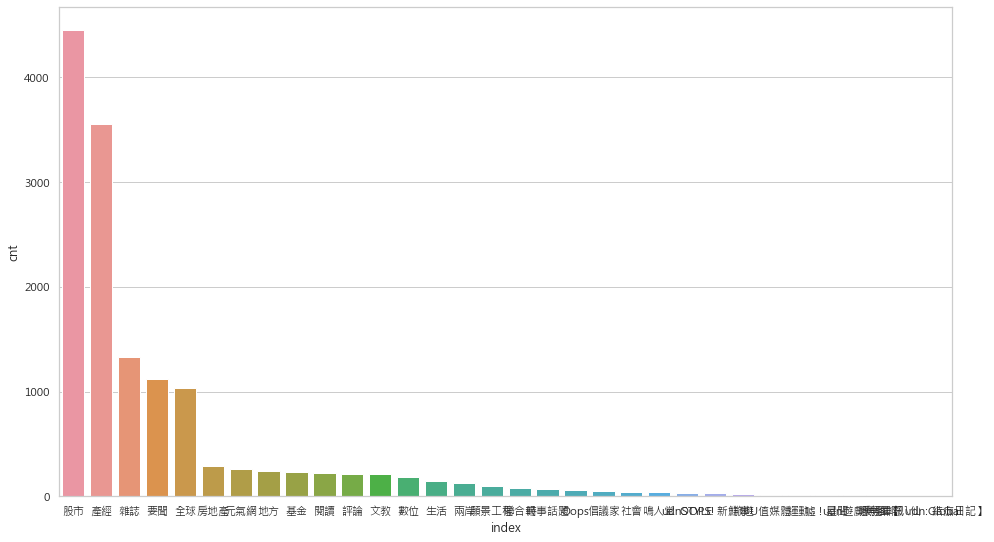

In [3]:
barplot_data = news['cateTitle'].value_counts()
barplot_data = barplot_data.reset_index(name='cnt')

plt.figure(figsize=(16,9))
sns.barplot(x='index', y='cnt', data=barplot_data)

### Vis2: udnnews counts by date 

In [4]:
news['Date'] = news['time'].apply(lambda x: x['dateTime'])
news['Date'] = news['Date'].apply(lambda x: x[:10])
news = news.loc[news['Date'] >= '2021-01-01']
news = news.loc[news['cateTitle'].apply(lambda x: x in ['股市','產經','全球'])]
news = news.loc[:,['title', 'paragraph', 'cateTitle','Date']]
news.head(3)

,url,titleLink,title,paragraph,cateLink,cateTitle,time,Date
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/122554/5884289,台積電產生短鏈效應 上下游「小雞」磁吸落腳高雄,台積電宣布投資高雄，市長陳其邁透露，從上游晶片到下游應用服務，高雄將陸續宣布大廠投資計畫。南...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-11 20:27:08', 'date': '2...",2021-11-11
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5884086,美要求半導體業者交資料 韓通商部長：下不為例,韓國產業通商資源部長官文勝煜（Moon Sung-wook）當地時間9日訪問美國，與美國商務...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-11-11 18:39:11', 'date': '2...",2021-11-11
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5884072,光洋科董座鬧雙胞 台鋼：別扯台積電國安議題,國內靶材大廠光洋科近期爆發經營權之爭，5日該公司公告改由王炯棻擔任董事長，8日卻再公告董事長...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-11 18:33:10', 'date': '2...",2021-11-11


<AxesSubplot:xlabel='Date', ylabel='Newscnt'>

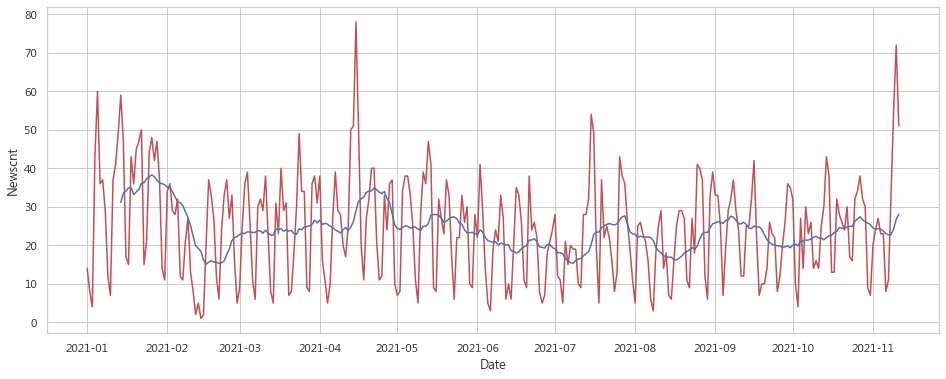

In [5]:
news['Date'] = news['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
plotdf1 = news.groupby('Date').size().reset_index(name='Newscnt')
plotdf1['r14_newscnt'] = plotdf1['Newscnt'].rolling(window=14).mean()

plt.figure(figsize=(16,6))
sns.lineplot(x='Date', y='Newscnt', data=plotdf1, color="r")
sns.lineplot(x='Date', y='r14_newscnt', data=plotdf1, color="b")   

In [6]:
news.shape

(7658, 8)

In [8]:
plotdf1['r3_Newscnt'] = plotdf1['Newscnt'].rolling(window=3).sum()
plotdf1.loc[:,['Date', 'Newscnt', 'r3_Newscnt']].head(10)

,Date,Newscnt,r3_Newscnt
0,2021-01-01,14,NaN
1,2021-01-02,8,NaN
2,2021-01-03,4,26.0
3,2021-01-04,43,55.0
4,2021-01-05,60,107.0
5,2021-01-06,36,139.0
6,2021-01-07,37,133.0
7,2021-01-08,29,102.0
8,2021-01-09,12,78.0
9,2021-01-10,7,48.0


### Vis3: tsmc closed price by date

<AxesSubplot:xlabel='Date', ylabel='Closing Price'>

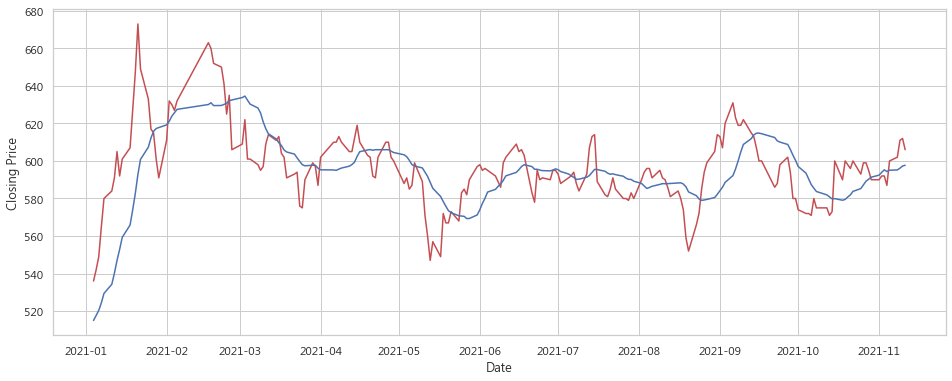

In [9]:
tsmc = pd.read_pickle('./twse_2330.pkl')

tsmc['Date'] = tsmc['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d').strftime('%Y-%m-%d'))

tsmc['Closing Price'] = tsmc['Closing Price'].apply(lambda x: float(x))
tsmc['r14_ClosingPrice'] = tsmc['Closing Price'].rolling(window=14).mean()

tsmc = tsmc.loc[tsmc['Date'] >= '2021-01-01']
tsmc['Date'] = tsmc['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

plt.figure(figsize=(16,6))
sns.lineplot(x='Date', y='Closing Price', data=tsmc, color="r")
sns.lineplot(x='Date', y='r14_ClosingPrice', data=tsmc, color="b")   

### Vis4: News volumn and tsmc closed price by date
- 每次波動(含正/負都會伴隨一些新聞聲量

<AxesSubplot:xlabel='Date', ylabel='r14_newscnt'>

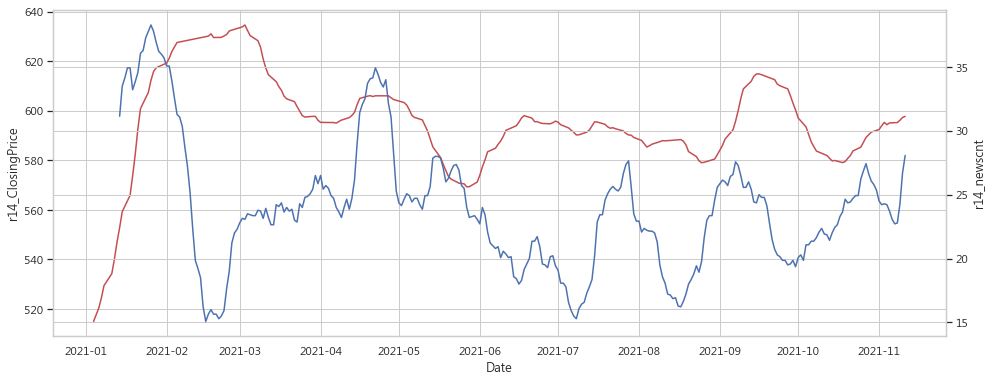

In [10]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x='Date', y='r14_ClosingPrice', data=tsmc, color='r')   
ax2 = ax.twinx()
sns.lineplot(x='Date', y='r14_newscnt', data=plotdf1, ax=ax2, color='b')   

### Vis5: Relation between newscount and price

In [11]:
plotdf1['Newscnt_minus_r14_newscnt'] = plotdf1['Newscnt'] - plotdf1['r14_newscnt']
tsmc['ClosingPrice_minus_r14_ClosingPrice'] = tsmc['Closing Price'] - tsmc['r14_ClosingPrice']

plotdf2 = pd.merge(left=tsmc.loc[:, ['Date', 'Closing Price', 'r14_ClosingPrice', 'ClosingPrice_minus_r14_ClosingPrice']], 
                   right=plotdf1.loc[:, ['Date', 'Newscnt','r14_newscnt', 'Newscnt_minus_r14_newscnt']],
                   how='left',
                   on='Date')
plotdf2.head(10)

,Date,Closing Price,r14_ClosingPrice,ClosingPrice_minus_r14_ClosingPrice,Newscnt,r14_newscnt,Newscnt_minus_r14_newscnt
0,2021-01-04,536.0,515.000000,21.000000,43,NaN,NaN
1,2021-01-05,542.0,517.714286,24.285714,60,NaN,NaN
2,2021-01-06,549.0,520.357143,28.642857,36,NaN,NaN
3,2021-01-07,565.0,524.428571,40.571429,37,NaN,NaN
4,2021-01-08,580.0,529.428571,50.571429,29,NaN,NaN
5,2021-01-11,584.0,534.285714,49.714286,37,NaN,NaN
6,2021-01-12,591.0,540.142857,50.857143,41,NaN,NaN
7,2021-01-13,605.0,547.000000,58.000000,49,NaN,NaN
8,2021-01-14,592.0,552.857143,39.142857,59,31.142857,27.857143
9,2021-01-15,601.0,559.285714,41.714286,47,33.500000,13.500000


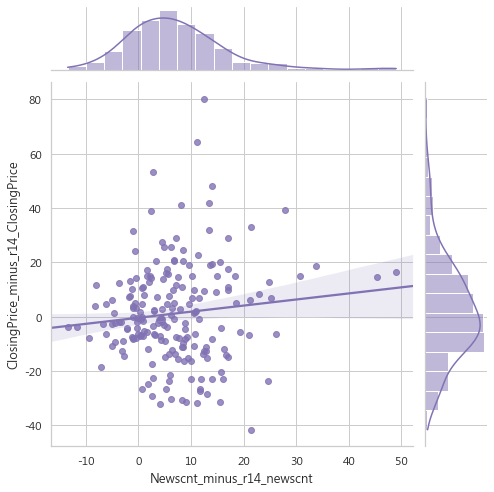

In [12]:
sns.jointplot(x="Newscnt_minus_r14_newscnt",
              y="ClosingPrice_minus_r14_ClosingPrice",
              data=plotdf2,
              kind="reg",
              truncate=False,
              color="m", height=7)

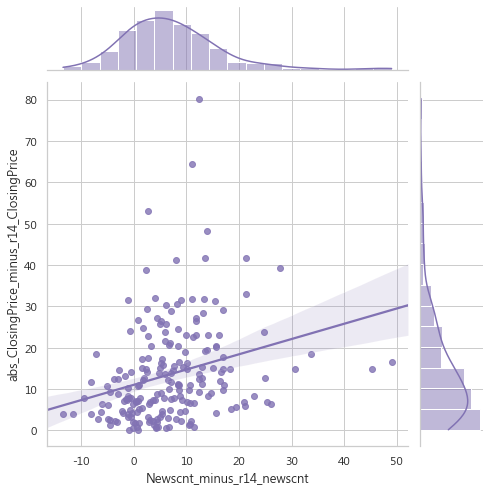

In [13]:
plotdf2['abs_ClosingPrice_minus_r14_ClosingPrice'] = plotdf2['ClosingPrice_minus_r14_ClosingPrice'].apply(lambda x: abs(x))
sns.jointplot(x="Newscnt_minus_r14_newscnt",
              y="abs_ClosingPrice_minus_r14_ClosingPrice",
              data=plotdf2,
              kind="reg",
              truncate=False,
              color="m", height=7)

In [14]:
plotdf2.corr()

,Closing Price,r14_ClosingPrice,ClosingPrice_minus_r14_ClosingPrice,Newscnt,r14_newscnt,Newscnt_minus_r14_newscnt,abs_ClosingPrice_minus_r14_ClosingPrice
Closing Price,1.000000,0.550262,0.500227,0.140762,0.221817,0.123750,0.137236
r14_ClosingPrice,0.550262,1.000000,-0.447758,-0.092502,0.048042,0.029566,-0.290549
ClosingPrice_minus_r14_ClosingPrice,0.500227,-0.447758,1.000000,0.246662,0.203590,0.111210,0.448263
Newscnt,0.140762,-0.092502,0.246662,1.000000,0.457874,0.864401,0.379446
r14_newscnt,0.221817,0.048042,0.203590,0.457874,1.000000,-0.051214,0.225303
Newscnt_minus_r14_newscnt,0.123750,0.029566,0.111210,0.864401,-0.051214,1.000000,0.278056
abs_ClosingPrice_minus_r14_ClosingPrice,0.137236,-0.290549,0.448263,0.379446,0.225303,0.278056,1.000000


### Vis6: Word Cloud by condiction
- QA: 為什麼新聞的數量變多跟股價走勢的關聯性低，但是卻跟股價變動的絕對值高呢?
- 新聞中其實包含了正向和負向的新聞，導致我們不能單純的用新聞數量來猜測股價走勢!
- 大漲、漲幅
- 大跌、跌幅、重挫、失守

In [15]:
words = ['台積電', '後悔', '報告', '三大法人', '英特爾','八年級', '少主', '公開', '脫鉤', '新冠', '過後', '生態', '台大', '清大', '半導體',
        '長榮', '擠下', '台股', '台指期' , '收盤' , '上漲', '大關', '稱霸', '謝金河', '成長', '黃捷', '開徵', '囤房稅', '陳其邁', '併行', '手軟', '上看',
        '出清', '搶救', '和碩' , '擁抱' , '元宇宙', '委託書', '護國神山', '民眾黨', '南電北送', '蔡英文', '效應', '領跌', '日月光', '航運', '營收', 
        '供應商', '動能', '房價', '光洋科','加碼','減碼', '國安', '議題', '公司', '隱匿', '先進',  '製程', '合併', '副總', '一成', '後市', '總司令','短線',
        '震盪', '年增', '挑戰', '史上', '飆漲', '復興','後果', '供給' , '確保', '童子賢', '都更','昨日','今日','董事長','聯發科','下修','下跌','代工廠','加權指數']
for word in words:
    jieba.add_word(word)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.452 seconds.
Prefix dict has been built successfully.


In [16]:
news['content'] = news['title'] + news['paragraph']
news['seg_content'] = news['content'].apply(lambda x: ' '.join(jieba.lcut(x)))
news.head(5)

,url,titleLink,title,paragraph,cateLink,cateTitle,time,Date,content,seg_content
1,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/122554/5884289,台積電產生短鏈效應 上下游「小雞」磁吸落腳高雄,台積電宣布投資高雄，市長陳其邁透露，從上游晶片到下游應用服務，高雄將陸續宣布大廠投資計畫。南...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-11 20:27:08', 'date': '2...",2021-11-11,台積電產生短鏈效應 上下游「小雞」磁吸落腳高雄台積電宣布投資高雄，市長陳其邁透露，從上游晶片...,台積電 產生 短鏈 效應 上下游 「 小雞 」 磁吸 落腳 高雄 台積電 宣布 投資 高...
3,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/6811/5884086,美要求半導體業者交資料 韓通商部長：下不為例,韓國產業通商資源部長官文勝煜（Moon Sung-wook）當地時間9日訪問美國，與美國商務...,https://udn.com/news/cate/7225,全球,"{'dateTime': '2021-11-11 18:39:11', 'date': '2...",2021-11-11,美要求半導體業者交資料 韓通商部長：下不為例韓國產業通商資源部長官文勝煜（Moon Sung...,美 要求 半導體 業者 交資料 韓 通商部 長 ： 下不為 例 韓國產業 通商 資源 部...
4,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/7240/5884072,光洋科董座鬧雙胞 台鋼：別扯台積電國安議題,國內靶材大廠光洋科近期爆發經營權之爭，5日該公司公告改由王炯棻擔任董事長，8日卻再公告董事長...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-11 18:33:10', 'date': '2...",2021-11-11,光洋科董座鬧雙胞 台鋼：別扯台積電國安議題國內靶材大廠光洋科近期爆發經營權之爭，5日該公司公...,光洋科 董座 鬧 雙胞 台鋼 ： 別扯 台積電 國安 議題 國內 靶材 大廠 光洋科 近...
6,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/122554/5884028,台積電赴高雄設廠 沈榮津：水電問題「都處理好了」,對於台積電（2330）確定至高雄市設廠，行政院副院長沈榮津今（11）日表示，這是大家一起努力...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-11 18:15:10', 'date': '2...",2021-11-11,台積電赴高雄設廠 沈榮津：水電問題「都處理好了」對於台積電（2330）確定至高雄市設廠，行政...,台積電 赴 高雄 設廠 沈榮津 ： 水電 問題 「 都 處理 好 了 」 對 於 台積電...
12,https://pgw.udn.com.tw/gw/photo.php?u=https://...,https://udn.com/news/story/122554/5883826,高市加速3年內整治台積電用地 環署：採多區併行,為因應台積電進駐，高雄市政府擬加速3年內完成高雄煉油廠污染整治，預計明年11月完成部分區塊。...,https://udn.com/news/cate/6644,產經,"{'dateTime': '2021-11-11 17:35:04', 'date': '2...",2021-11-11,高市加速3年內整治台積電用地 環署：採多區併行為因應台積電進駐，高雄市政府擬加速3年內完成高...,高市 加速 3 年 內 整治 台積電 用地 環署 ： 採多區 併行 為 因應 台積電 進...


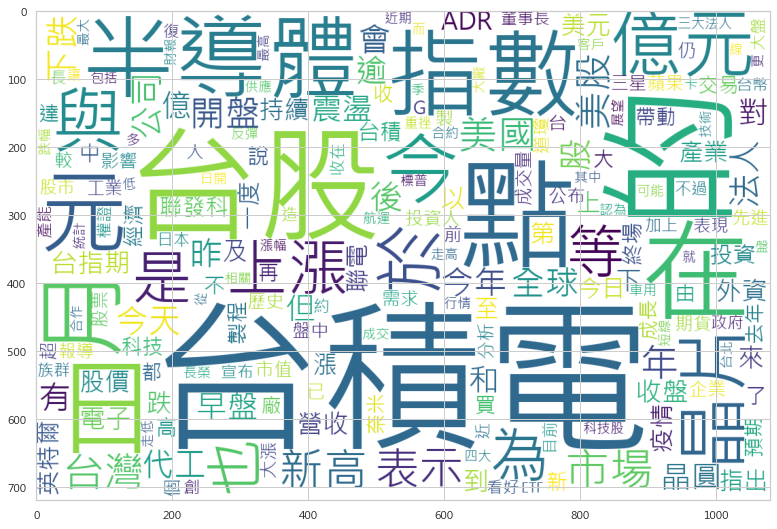

In [17]:
plt.figure(figsize=(16,9))
news_text = ' '.join(news['seg_content'])

results = {}

news_text = re.sub('[^\u4e00-\u9fa5A-Za-z]', ' ', news_text)

for word in news_text.split(' '):
    results[word] = results.get(word, 0) + 1

wc = wordcloud.WordCloud(background_color='white',
                         # margin=2, # 文字間距
                         font_path='./dyu_tm_workshop/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', # 設定字體
                         max_words=200, # 取多少文字在裡面
                         width=1080, 
                         height=720, # 長寬解析度
                         )
wc.generate_from_frequencies(results)
plt.imshow(wc)

## NLP

### Sentiment analysis

#### WiserAI lab

In [21]:
url = 'https://www.wisers.ai/?api=ailab-demo-apilb.wisers.com:8000/senti/api/processtext'
data = {'text' : '幾十年來從沒像此時這麼的風雨飄搖',
        'model' :'dl',
        'output_level' : 'subject',
        'show_scores' :'true'}
resp = requests.post(url, json=data)
resp.json()

{'docid': None,
 'is_successful': True,
 'message': '',
 'overall_res': {'sentiment': -1, 'sentiment_score': 0.29},
 'detail_res': []}

#### NTU

#### Snownlp

In [22]:
s = SnowNLP('幾十年來從沒像此時這麼的風雨飄搖')
s.sentiments

0.16114447574259694

In [23]:
s = SnowNLP('几十年来从没像此时这么的风雨飘摇')
s.sentiments

0.23925934418361228

In [24]:
s = SnowNLP('從來沒有這麼開心過')
s.sentiments

0.11793756783243114

In [25]:
s = SnowNLP('从来没有这么开心过')
s.sentiments

0.6541633786877609

#### baidu

##### 登入

##### 爬蟲

In [26]:
url = 'https://ai.baidu.com/aidemo'
data = {'apiType': 'nlp', 'type': 'sentimentClassify', 't1': '配置顶级，不解释，手机需要的各个方面都很完美'}
resp = requests.post(url, data=data)
resp.json()

{'errno': 0,
 'msg': 'success',
 'data': {'log_id': '8830730017211771246',
  'text': '配置顶级，不解释，手机需要的各个方面都很完美',
  'items': [{'positive_prob': 0.999956,
    'confidence': 0.999901,
    'negative_prob': 4.44642e-05,
    'sentiment': 2}]}}

In [114]:
# rs = requests.Session()
# for i in range(100):
#     url = 'https://ai.baidu.com/aidemo'
#     data = {'apiType': 'nlp', 'type': 'sentimentClassify', 't1': '配置顶级，不解释，手机需要的各个方面都很完美'}
#     resp = rs.post(url, data=data)
#     print(resp.json())
#     print('==========')

#### 翻譯+套件

### 標註

In [18]:

news.head(1)

,title,paragraph,Date,content,seg_content
1,台積電產生短鏈效應 上下游「小雞」磁吸落腳高雄,台積電宣布投資高雄，市長陳其邁透露，從上游晶片到下游應用服務，高雄將陸續宣布大廠投資計畫。南...,2021-11-11,台積電產生短鏈效應 上下游「小雞」磁吸落腳高雄台積電宣布投資高雄，市長陳其邁透露，從上游晶片...,台積電 產生 短鏈 效應 上下游 「 小雞 」 磁吸 落腳 高雄 台積電 宣布 投資 高...


In [19]:
cc = OpenCC('t2s')
news['ncontent'] = news['content'].apply(lambda x: cc.convert(x))
news['sentiment'] = news['ncontent'].apply(lambda x: SnowNLP(x).sentiments)
news.sort_values('sentiment')

,title,paragraph,Date,content,seg_content,ncontent,sentiment
7685,台積電南科14廠傳停電 各廠壓降因應,晶圓大廠台積電位於南科14廠，今天中午傳出停電，據知，疑因台電供電端跳電引起，在台電搶修後電...,2021-04-14,台積電南科14廠傳停電 各廠壓降因應晶圓大廠台積電位於南科14廠，今天中午傳出停電，據知，疑...,台積電 南科 14 廠傳 停電 各廠 壓降 因應晶 圓大廠 台積電 位 於 南科 14 ...,台积电南科14厂传停电 各厂压降因应晶圆大厂台积电位于南科14厂，今天中午传出停电，据知，疑...,3.885781e-14
4205,應收水位》公司賺幾10年⋯疫情一來「虧1年就活不下去」！為什麼？,摘要1.「應收水位」為公司應收帳款的多寡。2.年年賺錢的公司，最後卻關門大吉的原因，常和公司...,2021-07-17,應收水位》公司賺幾10年⋯疫情一來「虧1年就活不下去」！為什麼？摘要1.「應收水位」為公司應...,應收 水位 》 公司 賺 幾 10 年 ⋯ 疫情 一來 「 虧 1 年 就 活不下去 」 ！...,应收水位》公司赚几10年⋯疫情一来「亏1年就活不下去」！为什么？摘要1.「应收水位」为公司应...,1.221911e-12
6593,台電興達電廠事故 科學園區部分停電,台電興達電廠因為事故全廠停機，下午3時開始緊急分區輪流停電，竹科、中科、南科部分園區有停電情...,2021-05-13,台電興達電廠事故 科學園區部分停電台電興達電廠因為事故全廠停機，下午3時開始緊急分區輪流停電...,台電興達 電廠 事故 科學園區 部分 停電台 電興達 電廠 因為 事故 全廠 停機 ， ...,台电兴达电厂事故 科学园区部分停电台电兴达电厂因为事故全厂停机，下午3时开始紧急分区轮流停电...,1.605382e-12
7680,台積電南科停電波及3萬片晶圓 預估損失10億元以內,台積電南科P14廠今天受停電影響，業界預估台積電有3萬片晶圓受影響，損失金額在10億元以內。...,2021-04-14,台積電南科停電波及3萬片晶圓 預估損失10億元以內台積電南科P14廠今天受停電影響，業界預估...,台積電 南科 停電 波及 3 萬 片晶 圓 預估 損失 10 億元 以內 台積電 南科 ...,台积电南科停电波及3万片晶圆 预估损失10亿元以内台积电南科P14厂今天受停电影响，业界预估...,2.467382e-11
7673,台積電南科廠停電 台電：搶修後傍晚已恢復,南部科學園區今天無預警停電，傳出台積電南科廠受到影響。台電表示，因為上午某科技廠商施工時不慎...,2021-04-14,台積電南科廠停電 台電：搶修後傍晚已恢復南部科學園區今天無預警停電，傳出台積電南科廠受到影...,台積電 南科廠 停電 台電 ： 搶修 後 傍晚 已 恢 復 南部 科學園區 今天 無...,台积电南科厂停电 台电：抢修后傍晚已恢复南部科学园区今天无预警停电，传出台积电南科厂受到影...,4.959300e-11
...,...,...,...,...,...,...,...
11123,台灣全市場半導體指數上線 涵蓋市值近100%,台灣指數公司今天宣布，今天起揭示台灣全市場半導體指數收盤數值，涵蓋半導體產業市值比重約99....,2021-01-04,台灣全市場半導體指數上線 涵蓋市值近100%台灣指數公司今天宣布，今天起揭示台灣全市場半導體...,台灣 全市 場 半導體 指數 上線 涵蓋 市值 近 100% 台灣 指數 公司 今天 宣...,台湾全市场半导体指数上线 涵盖市值近100%台湾指数公司今天宣布，今天起揭示台湾全市场半导体...,1.000000e+00
9030,【美中台新博弈】晶片荒讓台灣捲入美中科技戰 台積電若成戰略弱點是好還是壞？,美國總統拜登上任不到兩個月，仍在評估整體對中政策，但從各項報告、重要官員發言判斷，拜登政府似...,2021-03-06,【美中台新博弈】晶片荒讓台灣捲入美中科技戰 台積電若成戰略弱點是好還是壞？美國總統拜登上任不...,【 美中台 新 博弈 】 晶片 荒讓 台灣 捲 入 美中 科技 戰 台積電 若成 戰略 ...,【美中台新博弈】晶片荒让台湾卷入美中科技战 台积电若成战略弱点是好还是坏？美国总统拜登上任不...,1.000000e+00
9317,創新照護產業 打造護國神山,財經立法促進院院長黃達業表示，創新性的規劃，建構健康照護體系的新興產業模式，可為台灣在全球建...,2021-02-25,創新照護產業 打造護國神山財經立法促進院院長黃達業表示，創新性的規劃，建構健康照護體系的新興...,創新照 護產業 打造 護國神山 財經 立法 促進院 院長 黃 達業 表示 ， 創新性 的...,创新照护产业 打造护国神山财经立法促进院院长黄达业表示，创新性的规划，建构健康照护体系的新兴...,1.000000e+00
9087,專訪大談台灣半導體實力 王美花：未來仍保有競爭,經濟部長王美花日前接受CNBC專訪，大談台灣防疫跟半導體的表現，認為面對中國大陸以國家力量扶...,2021-03-04,專訪大談台灣半導體實力 王美花：未來仍保有競爭經濟部長王美花日前接受CNBC專訪，大談台灣防...,專訪 大談 台灣 半導體 實力 王美花 ： 未來 仍 保有 競爭 經濟 部長 王美花 日...,专访大谈台湾半导体实力 王美花：未来仍保有竞争经济部长王美花日前接受CNBC专访，大谈台湾防...,1.000000e+00


In [20]:
news['pos_ind'] = news['sentiment'] >= 0.7
news['neg_ind'] = news['sentiment'] <= 0.3
news.head(3)

,title,paragraph,Date,content,seg_content,ncontent,sentiment,pos_ind,neg_ind
1,台積電產生短鏈效應 上下游「小雞」磁吸落腳高雄,台積電宣布投資高雄，市長陳其邁透露，從上游晶片到下游應用服務，高雄將陸續宣布大廠投資計畫。南...,2021-11-11,台積電產生短鏈效應 上下游「小雞」磁吸落腳高雄台積電宣布投資高雄，市長陳其邁透露，從上游晶片...,台積電 產生 短鏈 效應 上下游 「 小雞 」 磁吸 落腳 高雄 台積電 宣布 投資 高...,台积电产生短链效应 上下游「小鸡」磁吸落脚高雄台积电宣布投资高雄，市长陈其迈透露，从上游晶片...,0.999961,True,False
3,美要求半導體業者交資料 韓通商部長：下不為例,韓國產業通商資源部長官文勝煜（Moon Sung-wook）當地時間9日訪問美國，與美國商務...,2021-11-11,美要求半導體業者交資料 韓通商部長：下不為例韓國產業通商資源部長官文勝煜（Moon Sung...,美 要求 半導體 業者 交資料 韓 通商部 長 ： 下不為 例 韓國產業 通商 資源 部...,美要求半导体业者交资料 韩通商部长：下不为例韩国产业通商资源部长官文胜煜（Moon Sung...,0.260580,False,True
4,光洋科董座鬧雙胞 台鋼：別扯台積電國安議題,國內靶材大廠光洋科近期爆發經營權之爭，5日該公司公告改由王炯棻擔任董事長，8日卻再公告董事長...,2021-11-11,光洋科董座鬧雙胞 台鋼：別扯台積電國安議題國內靶材大廠光洋科近期爆發經營權之爭，5日該公司公...,光洋科 董座 鬧 雙胞 台鋼 ： 別扯 台積電 國安 議題 國內 靶材 大廠 光洋科 近...,光洋科董座闹双胞 台钢：别扯台积电国安议题国内靶材大厂光洋科近期爆发经营权之争，5日该公司公...,0.995832,True,False


In [21]:
news_senti_df = news.groupby('Date').agg({'pos_ind':'sum',
                                          'neg_ind':'sum',
                                          'sentiment':'mean'})

news_senti_df['r14poscnt'] = news_senti_df['pos_ind'].rolling(window=14).mean()
news_senti_df['r14negcnt'] = news_senti_df['neg_ind'].rolling(window=14).mean()
news_senti_df['r14sentiment'] = news_senti_df['sentiment'].rolling(window=14).mean()

news_senti_df['posind_minus_r14poscnt'] = news_senti_df['pos_ind'] - news_senti_df['r14poscnt']
news_senti_df['negind_minus_r14negcnt'] = news_senti_df['neg_ind'] - news_senti_df['r14negcnt']
news_senti_df['sentiment_minus_r14sentiment'] = news_senti_df['sentiment'] - news_senti_df['r14sentiment'] 

news_senti_df

,pos_ind,neg_ind,sentiment,r14poscnt,r14negcnt,r14sentiment,posind_minus_r14poscnt,negind_minus_r14negcnt,sentiment_minus_r14sentiment
Date,,,,,,,,,
2021-01-01,9,4,0.674626,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,7,0,0.920204,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,4,0,0.935455,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,24,15,0.596335,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,39,17,0.689957,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-11-07,8,2,0.786143,13.928571,7.285714,0.678294,-5.928571,-5.285714,0.107849
2021-11-08,18,13,0.584234,13.785714,7.642857,0.670819,4.214286,5.357143,-0.086585
2021-11-09,33,18,0.626702,14.571429,8.142857,0.667985,18.428571,9.857143,-0.041283


In [22]:
plotdf3 = pd.merge(left=tsmc.loc[:,['Date', 'r14_ClosingPrice', 'ClosingPrice_minus_r14_ClosingPrice']],
                   right=plotdf1.loc[:,['Date', 'r14_newscnt', 'Newscnt_minus_r14_newscnt']],
                   how='left',
                   on='Date')
plotdf3 = pd.merge(left=plotdf3,
                   right=news_senti_df.loc[:,['r14poscnt', 'r14negcnt', 'r14sentiment', 'posind_minus_r14poscnt', 'negind_minus_r14negcnt', 'sentiment_minus_r14sentiment']],
                   how='left',
                   on='Date')
plotdf3

,Date,r14_ClosingPrice,ClosingPrice_minus_r14_ClosingPrice,r14_newscnt,Newscnt_minus_r14_newscnt,r14poscnt,r14negcnt,r14sentiment,posind_minus_r14poscnt,negind_minus_r14negcnt,sentiment_minus_r14sentiment
0,2021-01-04,515.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-05,517.714286,24.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-06,520.357143,28.642857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-07,524.428571,40.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-08,529.428571,50.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
204,2021-11-05,595.071429,4.928571,23.714286,-0.714286,14.571429,7.571429,0.668133,-3.571429,2.428571,-0.150229
205,2021-11-08,595.214286,6.785714,22.785714,10.214286,13.785714,7.642857,0.670819,4.214286,5.357143,-0.086585
206,2021-11-09,596.142857,14.857143,24.285714,30.714286,14.571429,8.142857,0.667985,18.428571,9.857143,-0.041283
207,2021-11-10,597.285714,14.714286,26.714286,45.285714,15.071429,10.071429,0.653304,15.928571,27.928571,-0.192226


### Vis7

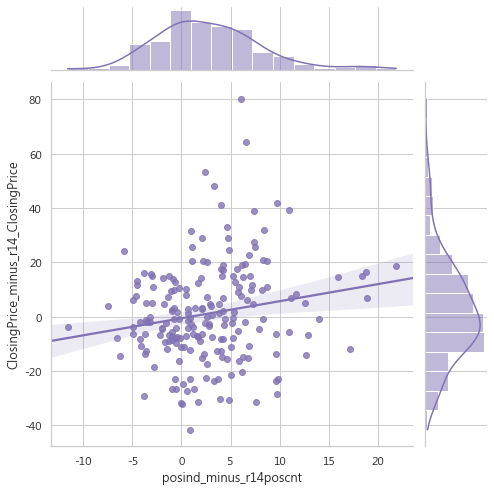

In [34]:
sns.jointplot(x="posind_minus_r14poscnt",
              y="ClosingPrice_minus_r14_ClosingPrice",
              data=plotdf3,
              kind="reg",
              truncate=False,
              color="m", height=7)

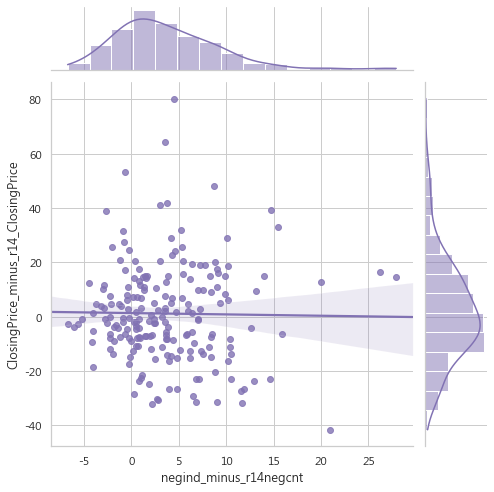

In [35]:
sns.jointplot(x="negind_minus_r14negcnt",
              y="ClosingPrice_minus_r14_ClosingPrice",
              data=plotdf3,
              kind="reg",
              truncate=False,
              color="m", height=7)

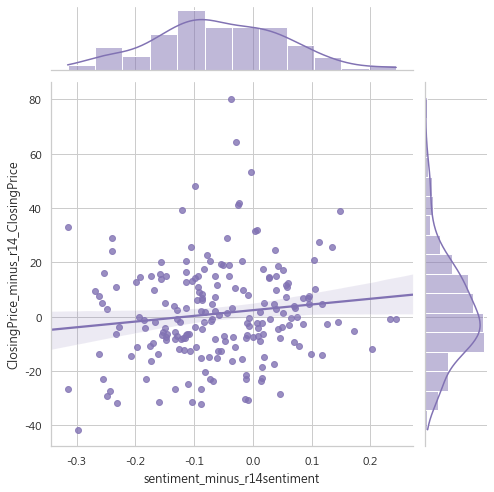

In [36]:
sns.jointplot(x="sentiment_minus_r14sentiment",
              y="ClosingPrice_minus_r14_ClosingPrice",
              data=plotdf3,
              kind="reg",
              truncate=False,
              color="m", height=7)

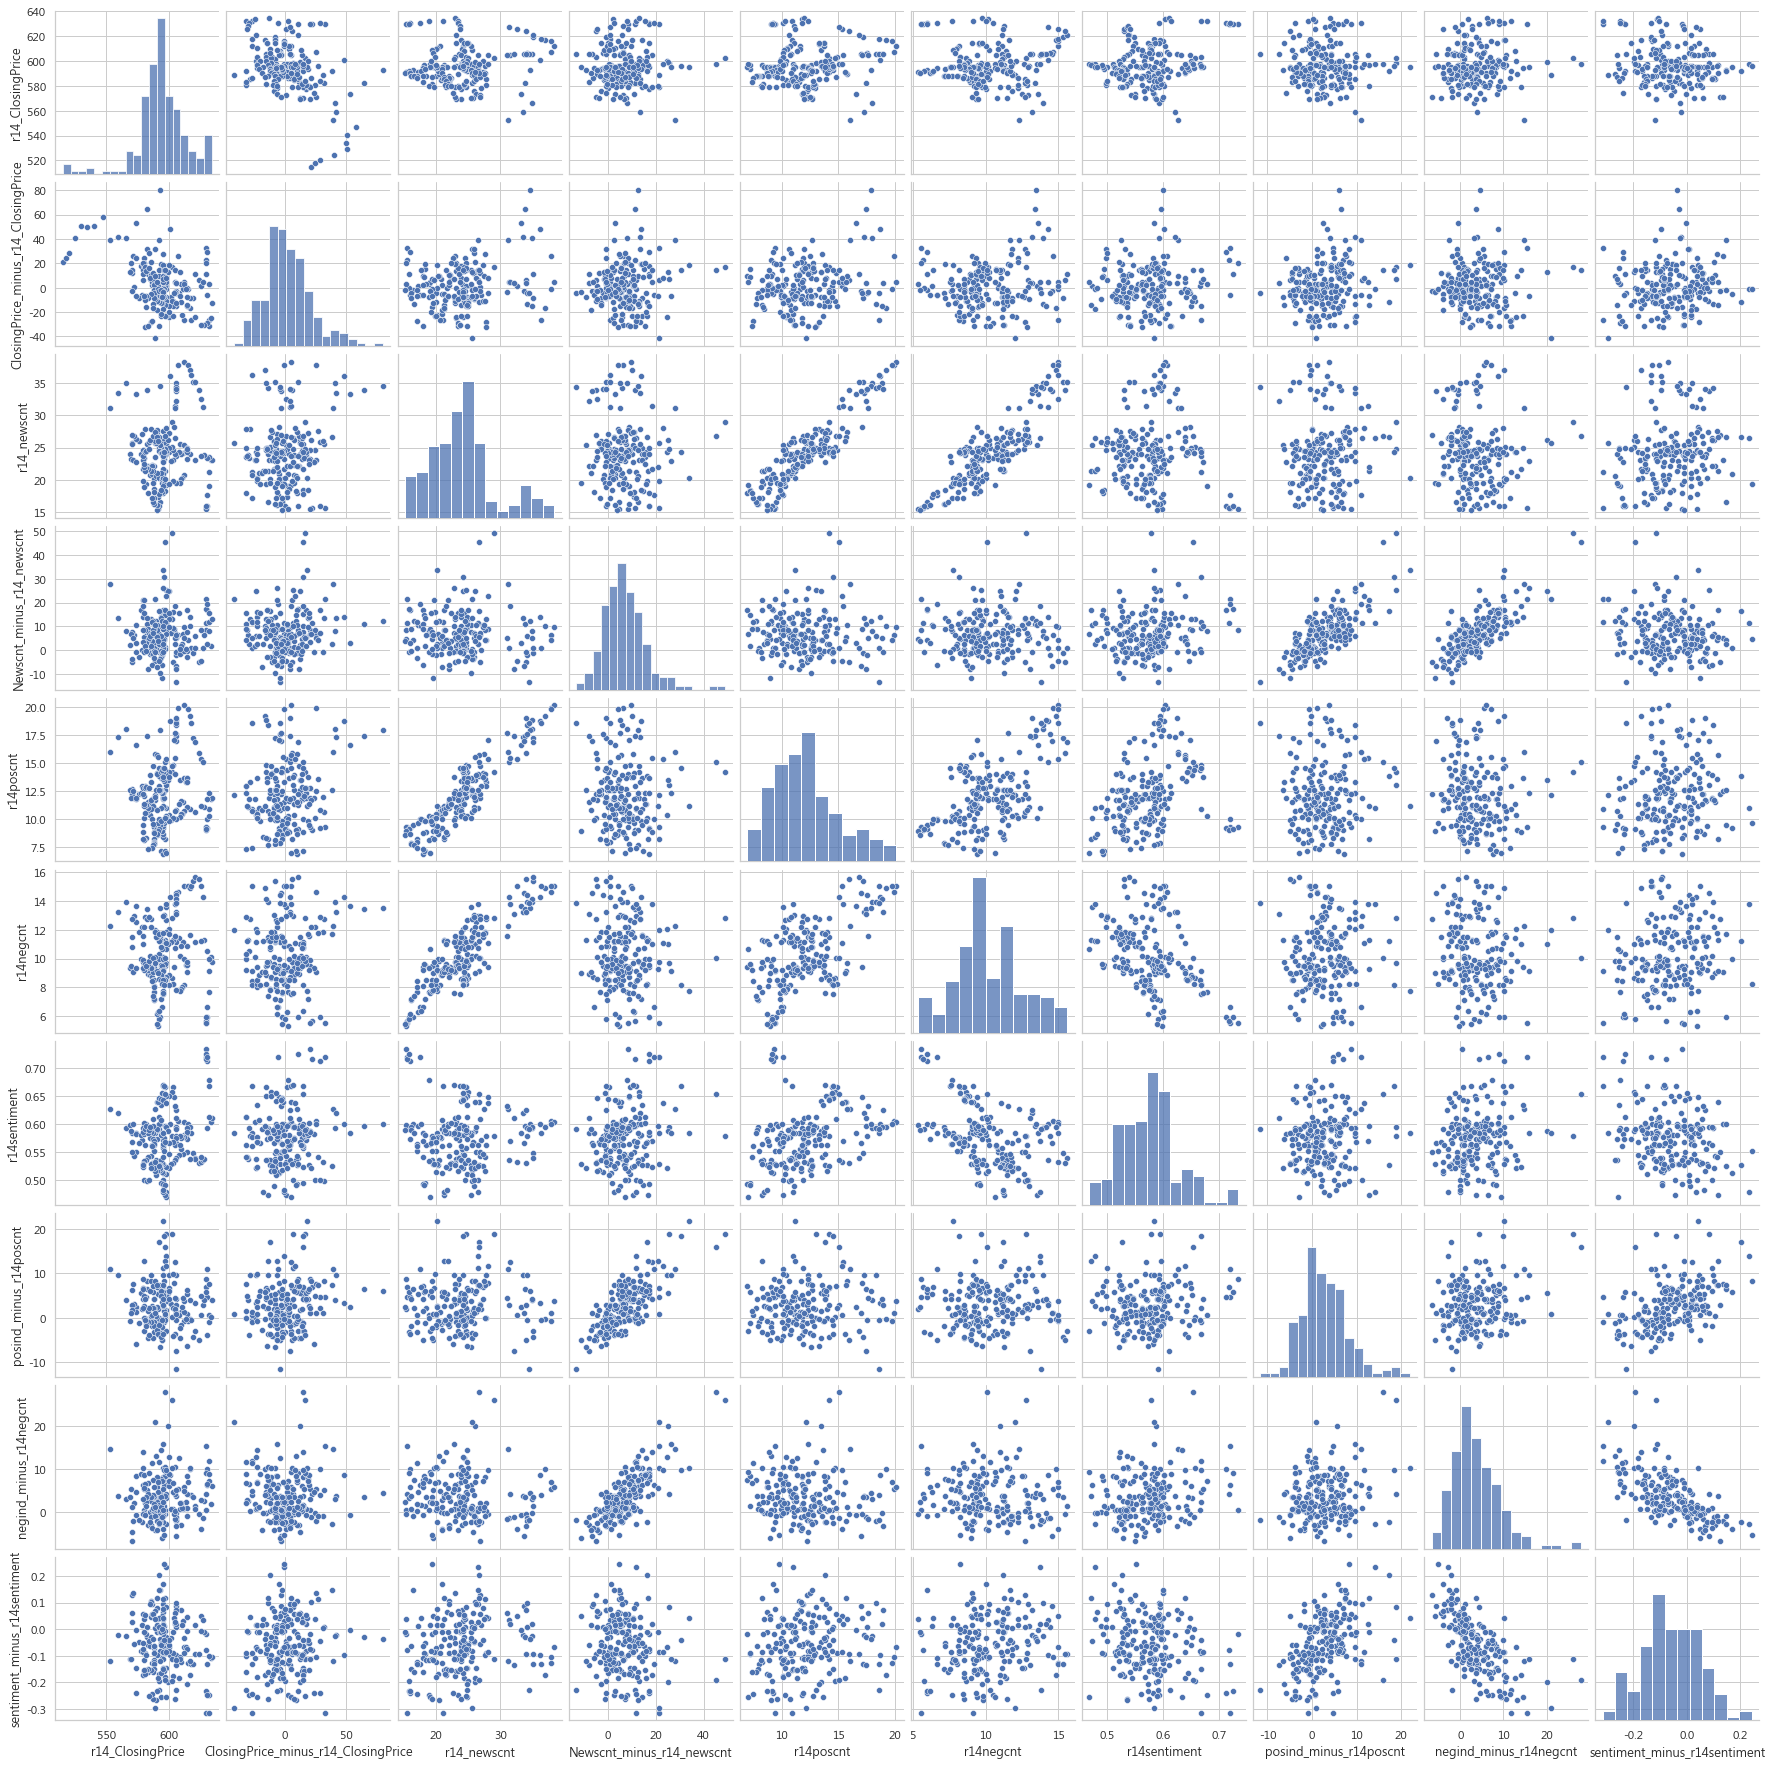

In [37]:
sns.pairplot(plotdf3)

In [38]:
plotdf3.corr()

,r14_ClosingPrice,ClosingPrice_minus_r14_ClosingPrice,r14_newscnt,Newscnt_minus_r14_newscnt,r14poscnt,r14negcnt,r14sentiment,posind_minus_r14poscnt,negind_minus_r14negcnt,sentiment_minus_r14sentiment
r14_ClosingPrice,1.000000,-0.447758,0.048042,0.029566,0.109815,0.011578,0.241324,-0.032724,0.089437,-0.158979
ClosingPrice_minus_r14_ClosingPrice,-0.447758,1.000000,0.203590,0.111210,0.205347,0.106020,0.097208,0.181936,-0.014850,0.126458
r14_newscnt,0.048042,0.203590,1.000000,-0.051214,0.915003,0.873134,-0.026164,0.019683,-0.084404,0.159400
Newscnt_minus_r14_newscnt,0.029566,0.111210,-0.051214,1.000000,-0.037741,-0.059391,0.187745,0.770759,0.789662,-0.135164
r14poscnt,0.109815,0.205347,0.915003,-0.037741,1.000000,0.607148,0.315590,0.027772,-0.073549,0.119526
r14negcnt,0.011578,0.106020,0.873134,-0.059391,0.607148,1.000000,-0.422499,0.000631,-0.077336,0.162944
r14sentiment,0.241324,0.097208,-0.026164,0.187745,0.315590,-0.422499,1.000000,0.098126,0.189960,-0.265177
posind_minus_r14poscnt,-0.032724,0.181936,0.019683,0.770759,0.027772,0.000631,0.098126,1.000000,0.242265,0.472305
negind_minus_r14negcnt,0.089437,-0.014850,-0.084404,0.789662,-0.073549,-0.077336,0.189960,0.242265,1.000000,-0.657117
sentiment_minus_r14sentiment,-0.158979,0.126458,0.159400,-0.135164,0.119526,0.162944,-0.265177,0.472305,-0.657117,1.000000


## 後續優化

## 資料標註

In [25]:
news.sort_values('sentiment').head(20)

,title,paragraph,Date,content,seg_content,ncontent,sentiment,pos_ind,neg_ind
7685,台積電南科14廠傳停電 各廠壓降因應,晶圓大廠台積電位於南科14廠，今天中午傳出停電，據知，疑因台電供電端跳電引起，在台電搶修後電...,2021-04-14,台積電南科14廠傳停電 各廠壓降因應晶圓大廠台積電位於南科14廠，今天中午傳出停電，據知，疑...,台積電 南科 14 廠傳 停電 各廠 壓降 因應晶 圓大廠 台積電 位 於 南科 14 ...,台积电南科14厂传停电 各厂压降因应晶圆大厂台积电位于南科14厂，今天中午传出停电，据知，疑...,3.885781e-14,False,True
4205,應收水位》公司賺幾10年⋯疫情一來「虧1年就活不下去」！為什麼？,摘要1.「應收水位」為公司應收帳款的多寡。2.年年賺錢的公司，最後卻關門大吉的原因，常和公司...,2021-07-17,應收水位》公司賺幾10年⋯疫情一來「虧1年就活不下去」！為什麼？摘要1.「應收水位」為公司應...,應收 水位 》 公司 賺 幾 10 年 ⋯ 疫情 一來 「 虧 1 年 就 活不下去 」 ！...,应收水位》公司赚几10年⋯疫情一来「亏1年就活不下去」！为什么？摘要1.「应收水位」为公司应...,1.221911e-12,False,True
6593,台電興達電廠事故 科學園區部分停電,台電興達電廠因為事故全廠停機，下午3時開始緊急分區輪流停電，竹科、中科、南科部分園區有停電情...,2021-05-13,台電興達電廠事故 科學園區部分停電台電興達電廠因為事故全廠停機，下午3時開始緊急分區輪流停電...,台電興達 電廠 事故 科學園區 部分 停電台 電興達 電廠 因為 事故 全廠 停機 ， ...,台电兴达电厂事故 科学园区部分停电台电兴达电厂因为事故全厂停机，下午3时开始紧急分区轮流停电...,1.605382e-12,False,True
7680,台積電南科停電波及3萬片晶圓 預估損失10億元以內,台積電南科P14廠今天受停電影響，業界預估台積電有3萬片晶圓受影響，損失金額在10億元以內。...,2021-04-14,台積電南科停電波及3萬片晶圓 預估損失10億元以內台積電南科P14廠今天受停電影響，業界預估...,台積電 南科 停電 波及 3 萬 片晶 圓 預估 損失 10 億元 以內 台積電 南科 ...,台积电南科停电波及3万片晶圆 预估损失10亿元以内台积电南科P14厂今天受停电影响，业界预估...,2.467382e-11,False,True
7673,台積電南科廠停電 台電：搶修後傍晚已恢復,南部科學園區今天無預警停電，傳出台積電南科廠受到影響。台電表示，因為上午某科技廠商施工時不慎...,2021-04-14,台積電南科廠停電 台電：搶修後傍晚已恢復南部科學園區今天無預警停電，傳出台積電南科廠受到影...,台積電 南科廠 停電 台電 ： 搶修 後 傍晚 已 恢 復 南部 科學園區 今天 無...,台积电南科厂停电 台电：抢修后傍晚已恢复南部科学园区今天无预警停电，传出台积电南科厂受到影...,4.959300e-11,False,True
8683,台積電去年股息合計達10元 張忠謀估入帳12.51億元,台積電（2330）去年第3季2.5元現金股利今（17）日除息，股利預計4月15日發放，下次除...,2021-03-17,台積電去年股息合計達10元 張忠謀估入帳12.51億元台積電（2330）去年第3季2.5元現...,台積電 去年 股息 合計達 10 元 張忠謀 估入帳 12.51 億元 台積電 （ 23...,台积电去年股息合计达10元 张忠谋估入帐12.51亿元台积电（2330）去年第3季2.5元现...,5.414069e-11,False,True
6140,台指期開盤上漲198點 台積期貨開漲6元,"台指期今(28)日開盤16,731點，上漲198點。台積電（2330）期貨近月合約開盤587...",2021-05-28,"台指期開盤上漲198點 台積期貨開漲6元台指期今(28)日開盤16,731點，上漲198點。...",台指期 開盤 上漲 198 點 台積期 貨開漲 6 元 台指期 今 ( 28 ) 日 開...,"台指期开盘上涨198点 台积期货开涨6元台指期今(28)日开盘16,731点，上涨198点。...",7.263434e-11,False,True
10160,"跌破10日線！台股大跌287點 15,658點作收",春節前賣壓出籠，台股今（26）日跌破10日均線，且一度大跌逾300點，尾盤過後買單敲進台積電...,2021-01-26,"跌破10日線！台股大跌287點 15,658點作收 春節前賣壓出籠，台股今（26）日跌破1...","跌破 10 日線 ！ 台股 大跌 287 點 15 , 658 點作收 春節 前...","跌破10日线！台股大跌287点 15,658点作收 春节前卖压出笼，台股今（26）日跌破1...",9.025536e-11,False,True
6588,南科7廠商受輪流供電影響 新營區最高影響6萬4千戶,興達電廠停機造成供電受到影響，南科園區全區雖受壓降影響，但沒有停電，部分廠商因分區輪流供電影...,2021-05-13,南科7廠商受輪流供電影響 新營區最高影響6萬4千戶興達電廠停機造成供電受到影響，南科園區全區...,南科 7 廠商 受輪 流供 電影響 新營區 最高 影響 6 萬 4 千戶 興達 電廠 停...,南科7厂商受轮流供电影响 新营区最高影响6万4千户兴达电厂停机造成供电受到影响，南科园区全区...,1.282190e-10,False,True
6585,興達電廠事故輪流停電 科學園區約55家廠商受影響,因興達電廠事故，台電公司執行緊急分區輪流停電，各科學園區已持續清查受影響之用電廠商，並配合台...,2021-05-13,興達電廠事故輪流停電 科學園區約55家廠商受影響因興達電廠事故，台電公司執行緊急分區輪流停電...,興達 電廠 事故 輪流 停電 科學園區 約 55 家廠 商受 影響 因興達 電廠 事故 ...,兴达电厂事故轮流停电 科学园区约55家厂商受影响因兴达电厂事故，台电公司执行紧急分区轮流停电...,2.247196e-10,False,True


In [26]:
news.sort_values('sentiment').tail(20)

,title,paragraph,Date,content,seg_content,ncontent,sentiment,pos_ind,neg_ind
617,劉德音：TSIA估今年台灣半導體產業產值 將突破4兆元,台積電（2330）董事長劉德音今日以台灣半導體產業協會（TSIA）理事長身分出席TSIA首度...,2021-10-27,劉德音：TSIA估今年台灣半導體產業產值 將突破4兆元台積電（2330）董事長劉德音今日以台...,劉德音 ： TSIA 估 今年 台灣 半導體 產業 產值 將 突破 4 兆元 台積電 （...,刘德音：TSIA估今年台湾半导体产业产值 将突破4兆元台积电（2330）董事长刘德音今日以台...,1.0,True,False
667,SEMI：台半導體面臨5大新挑戰 產業要成為造局者,國際半導體產業協會（SEMI）全球行銷長暨台灣區總裁曹世綸今天表示，台灣半導體產業面臨國家主...,2021-10-26,SEMI：台半導體面臨5大新挑戰 產業要成為造局者國際半導體產業協會（SEMI）全球行銷長暨...,SEMI ： 台 半導體 面臨 5 大新 挑戰 產業 要 成為 造局 者 國際 半導體 ...,SEMI：台半导体面临5大新挑战 产业要成为造局者国际半导体产业协会（SEMI）全球行销长暨...,1.0,True,False
9298,樂見美攜手台灣強化半導體供應鏈 學者：強強結盟,美國總統拜登今天簽署行政命令，與盟友合作，強化美國關鍵產業供應鏈，包含半導體；台經院學者分析...,2021-02-25,樂見美攜手台灣強化半導體供應鏈 學者：強強結盟美國總統拜登今天簽署行政命令，與盟友合作，強化...,樂見 美攜手 台灣 強化 半導體 供應 鏈 學者 ： 強強 結盟 美國 總統 拜登 今天...,乐见美携手台湾强化半导体供应链 学者：强强结盟美国总统拜登今天签署行政命令，与盟友合作，强化...,1.0,True,False
1997,慧榮總座樂觀看明年需求 盼獲更多台積電產能支援,全球 NAND 快閃記憶體控制晶片品牌慧榮科技總經理苟嘉章今日提到，產業實際看法和分析師預測...,2021-09-16,慧榮總座樂觀看明年需求 盼獲更多台積電產能支援全球 NAND 快閃記憶體控制晶片品牌慧榮科技...,慧榮 總座 樂觀 看 明年 需求 盼 獲 更 多 台積電 產能 支援 全球 NAND...,慧荣总座乐观看明年需求 盼获更多台积电产能支援全球 NAND 快闪记忆体控制晶片品牌慧荣科技...,1.0,True,False
9086,中國傾力發展半導體 王美花點出台灣半導體五大競爭力,針對國外媒體CNBC專訪經濟部長王美花分享台灣半導體的發展，王美花今（4）日提到，中國用國家...,2021-03-04,中國傾力發展半導體 王美花點出台灣半導體五大競爭力針對國外媒體CNBC專訪經濟部長王美花分享...,中國 傾力 發展 半導體 王美花點 出台 灣 半導體 五大 競爭 力針 對 國外 媒體 ...,中国倾力发展半导体 王美花点出台湾半导体五大竞争力针对国外媒体CNBC专访经济部长王美花分享...,1.0,True,False
101,童子賢：元宇宙還沒精確定義 台灣站在討論領先群,代工大廠和碩董事長童子賢今天表示，元宇宙（Metaverse）還沒有精確的定義或產品，對於5...,2021-11-10,童子賢：元宇宙還沒精確定義 台灣站在討論領先群代工大廠和碩董事長童子賢今天表示，元宇宙（Me...,童子賢 ： 元宇宙 還沒 精確 定義 台灣 站 在 討論 領先群 代工 大廠 和碩 董事...,童子贤：元宇宙还没精确定义 台湾站在讨论领先群代工大厂和硕董事长童子贤今天表示，元宇宙（Me...,1.0,True,False
7079,中信募資半導體ETF將上市該買嗎？股民分析：要看一檔關鍵股,ETF夯！中信投信近日遞件申請台灣半導體指數資格認可，取得半導體ETF的募集核准函，ETF正...,2021-04-29,中信募資半導體ETF將上市該買嗎？股民分析：要看一檔關鍵股ETF夯！中信投信近日遞件申請台灣...,中信 募資 半導體 ETF 將 上市 該 買 嗎 ？ 股民 分析 ： 要 看 一檔 關鍵 股...,中信募资半导体ETF将上市该买吗？股民分析：要看一档关键股ETF夯！中信投信近日递件申请台湾...,1.0,True,False
9158,美國會報告示警：美中競賽 美太依賴台灣晶片,美國國會設立的諮詢委員會「人工智慧國家安全委員會」一日提出報告示警說，美國可能將因為依賴台灣...,2021-03-03,美國會報告示警：美中競賽 美太依賴台灣晶片美國國會設立的諮詢委員會「人工智慧國家安全委員會」...,美國會 報告 示警 ： 美中 競賽 美太依賴 台灣 晶片 美國國會 設立 的 諮 詢委員...,美国会报告示警：美中竞赛 美太依赖台湾晶片美国国会设立的咨询委员会「人工智慧国家安全委员会」...,1.0,True,False
2174,南韓晶片業也鬧人才荒 聽聽這位教授怎麼說,經過數十年的努力，南韓已躍居全球記憶晶片市場霸主，但南韓社會持續高齡化，加上年輕世代對工程師...,2021-09-12,南韓晶片業也鬧人才荒 聽聽這位教授怎麼說經過數十年的努力，南韓已躍居全球記憶晶片市場霸主，但...,南韓 晶片 業也 鬧 人才 荒 聽 聽 這位 教授 怎麼 說 經過數 十年 的 努力 ，...,南韩晶片业也闹人才荒 听听这位教授怎么说经过数十年的努力，南韩已跃居全球记忆晶片市场霸主，但...,1.0,True,False
5450,新聞中的法律／催生生技界的台積電,《生技新藥發展條例》今年底租稅優惠即將屆滿，因此經濟部業研擬修正草案，修正名稱為《生技醫藥及...,2021-06-21,新聞中的法律／催生生技界的台積電《生技新藥發展條例》今年底租稅優惠即將屆滿，因此經濟部業研擬...,新聞 中 的 法律 ／ 催生 生技界 的 台積電 《 生技新藥 發展 條例 》 今年底 租稅...,新闻中的法律／催生生技界的台积电《生技新药发展条例》今年底租税优惠即将届满，因此经济部业研拟...,1.0,True,False


### model

In [103]:
# jiagu
# 
# udnnews['title_s'] = udnnews['title'].apply(lambda x: cc.convert(x))
# udnnews['sent_score'] =  udnnews['title_s'].apply(lambda x: jiagu.sentiment(x))
# udnnews